In [1]:
import pandas as pd

In [25]:
us_titles_df = pd.DataFrame({})
us_titles_set = set()

In [ ]:
count = 0
for chunk in pd.read_csv("title.akas.tsv", sep='\t',chunksize=1000000):
    chunk = chunk.loc[chunk['region']=='US',['titleId']]
    us_titles_set = us_titles_set | set(chunk['titleId'])
    """
    for id in chunk['titleId']:
        us_titles_set.add(id)"""
    count += 1000000

print (len(us_titles_set))

1521307


In [98]:
df_movies = pd.DataFrame({})
df_shows = pd.DataFrame({})

count = 100000
for chunk in pd.read_csv("title.basics.tsv", sep='\t',chunksize=100000):
    print(f'count: {count:,}')
    count+=100000

    chunk_movies = chunk.loc[(chunk['tconst'].isin(us_titles_set)) &\
                        (chunk['titleType'] == 'movie'), \
                        ['tconst','primaryTitle','startYear','genres','isAdult']]
    df_movies = pd.concat([df_movies,chunk_movies],axis=0)
    print(f"df_movies length: {len(df_movies)}")
    
    chunk_shows = chunk.loc[(chunk['tconst'].isin(us_titles_set)) &\
                        ((chunk['titleType'] == 'tvseries') | (chunk['titleType'] == 'tvMiniSeries')), \
                        ['tconst','primaryTitle','startYear','genres','isAdult']]
    df_shows = pd.concat([df_shows,chunk_shows],axis=0)
    print(f"df_shows length: {len(df_shows)}")

df_movies.to_csv("imdbMoviesCleaned.csv", index=False)
df_shows.to_csv("imdbShowsCleaned.csv", index=False)



count: 100,000
df_movies length: 47875
df_shows length: 351
count: 200,000
df_movies length: 72568
df_shows length: 732
count: 300,000
df_movies length: 84481
df_shows length: 975
count: 400,000
df_movies length: 92486
df_shows length: 1232
count: 500,000
df_movies length: 98416
df_shows length: 1461
count: 600,000
df_movies length: 98416
df_shows length: 1461
count: 700,000
df_movies length: 98416
df_shows length: 1461
count: 800,000
df_movies length: 100356
df_shows length: 1550
count: 900,000
df_movies length: 102369
df_shows length: 1660
count: 1,000,000
df_movies length: 104187
df_shows length: 1793
count: 1,100,000
df_movies length: 106097
df_shows length: 1947
count: 1,200,000
df_movies length: 108035
df_shows length: 2113
count: 1,300,000
df_movies length: 110015
df_shows length: 2289
count: 1,400,000
df_movies length: 111828
df_shows length: 2522
count: 1,500,000
df_movies length: 113724
df_shows length: 2695
count: 1,600,000
df_movies length: 115536
df_shows length: 2875
coun

C:\Users\dondi\AppData\Local\Temp\ipykernel_14280\182322802.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("title.basics.tsv", sep='\t',chunksize=100000):


count: 3,000,000
df_movies length: 140816
df_shows length: 5410
count: 3,100,000
df_movies length: 142460
df_shows length: 5589
count: 3,200,000
df_movies length: 144203
df_shows length: 5759
count: 3,300,000
df_movies length: 146050
df_shows length: 5934
count: 3,400,000
df_movies length: 147781
df_shows length: 6118
count: 3,500,000
df_movies length: 149562
df_shows length: 6281
count: 3,600,000
df_movies length: 151236
df_shows length: 6441
count: 3,700,000
df_movies length: 152987
df_shows length: 6639
count: 3,800,000
df_movies length: 154919
df_shows length: 6839
count: 3,900,000
df_movies length: 156856
df_shows length: 7018
count: 4,000,000
df_movies length: 158990
df_shows length: 7200
count: 4,100,000
df_movies length: 160180
df_shows length: 7321
count: 4,200,000
df_movies length: 161441
df_shows length: 7416
count: 4,300,000
df_movies length: 162742
df_shows length: 7492
count: 4,400,000
df_movies length: 164087
df_shows length: 7607
count: 4,500,000
df_movies length: 16588

In [ ]:
df_movies = df_movies[df_movies['startYear'] != '\\N']
df_shows = df_shows[df_shows['startYear'] != '\\N']

length before drop: 263030
length after drop: 263030
length before drop: 22551
length after drop: 20159


In [128]:

df_movies = df_movies.sort_values(by='startYear', ascending=False)
df_shows = df_shows.sort_values(by='startYear', ascending=False)
df_movies.to_csv("imdbMoviesCleaned.csv", index=False)
df_shows.to_csv("imdbShowsCleaned.csv", index=False)

In [137]:
df_movies['startYear'] = df_movies['startYear'].apply(lambda x: int(x))

In [151]:
print(f"percent of movies that are rated as 'adult': {(len(df_movies[df_movies['isAdult']==1])/len(df_movies))*100:.2f}%")

percent of movies that are rated as 'adult': 2.39%


In [ ]:
#all adult movie names lol
df_adult = (df_movies[df_movies['isAdult']==1])
df_adult.to_csv("adult_movies.csv", index=False)

all adult movie names lol:


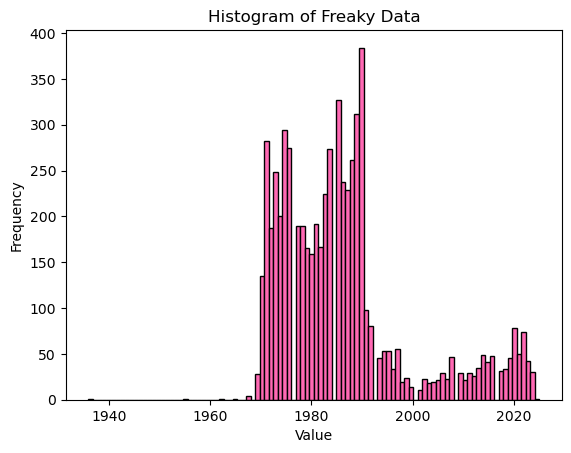

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = df_adult['startYear']
plt.hist(data, bins=100, color='hotpink', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Freaky Data')
plt.show()

In [160]:
display(df_adult)

,tconst,primaryTitle,startYear,genres,isAdult
8511919,tt35441262,Black Lilith,2025,Adult,1
8196609,tt33749233,Deep Into Blu,2024,"Adult,Fantasy",1
8167018,tt33565730,Booty Bandits - Bruthaload Volume 13,2024,Adult,1
8091765,tt33347967,The Hunger,2024,"Adult,Drama",1
7801623,tt32482780,Slobber Bone,2024,Adult,1
...,...,...,...,...,...
122507,tt0125862,Love Mexican Style,1968,Adult,1
144158,tt0148719,Sin Magazine,1965,Thriller,1
340509,tt0355679,Lash of Lust,1962,Drama,1
276629,tt0289096,Boudoir Secrets,1955,\N,1


In [150]:
print(f"percent of movies made between 2000-2025: {(len(df_movies[df_movies['startYear'].isin(range(2000,2026))])/len(df_movies))*100:.2f}%")

percent of movies made between 2000-2025: 64.77%


In [ ]:
#find the director ids for each title, in both movies and shows
director_id_dict = {} #key = titltle_id, value = array of director_ids
count = 0
for chunk in pd.read_csv("title.crew.tsv", sep='\t',chunksize=1000000):
    count+=1000000
    print(f"count: {count:,}")
    chunk_us = chunk.loc[chunk['tconst'].isin(us_titles_set), ['tconst','directors']]
    for row in chunk_us.itertuples():
        director_id_dict.update({row.tconst:row.directors})
        #print(f"id: {row.tconst}, directors: {row.directors}")


count: 1,000,000
count: 2,000,000
count: 3,000,000
count: 4,000,000
count: 5,000,000
count: 6,000,000
count: 7,000,000
count: 8,000,000
count: 9,000,000
count: 10,000,000
count: 11,000,000
count: 12,000,000


In [187]:
df_movies['directorIds'] = df_movies['tconst'].apply(lambda id: director_id_dict.get(id))
df_movies.head(50)                          
df_shows['directorIds'] = df_shows['tconst'].apply(lambda id: director_id_dict.get(id))
df_shows.head(50)

,tconst,primaryTitle,startYear,genres,isAdult,director_ids,directorIds
7944092,tt32918634,2028 UEFA European Football Championship,2028,Sport,0,\N,\N
7923359,tt32863287,LA 2028: Games of the XXXIV Olympiad,2028,Sport,0,\N,\N
7923360,tt32863288,2028 Summer Paralympics,2028,Sport,0,\N,\N
7949898,tt32981865,2028 Republican National Convention,2028,News,0,\N,\N
7942260,tt32915474,2027 FIFA Women's World Cup,2027,Sport,0,\N,\N
7923367,tt32863295,Dakar 2026: Games of the V Youth Olympiad,2026,Sport,0,\N,\N
7942257,tt32915471,2026 FIFA World Cup,2026,Sport,0,\N,\N
7924443,tt32864374,The Independent Voter,2026,"Comedy,Documentary,History",0,nm11030885,nm11030885
5357046,tt21097264,East of Eden,2026,Drama,0,"nm0204628,nm0166438","nm0204628,nm0166438"
8732726,tt36374991,Love Loaded,2026,Drama,0,nm5876959,nm5876959


In [ ]:
#map director ids to actual names

#make dictionary of id to name... all people, not just directors
person_id_to_name_dict = {}

for chunk in pd.read_csv("name.basics.tsv", sep='\t',chunksize=1000000):
    for row in chunk.itertuples():
        if 'director' in  row.primaryProfession:
            person_id_to_name_dict.update({row.nconst : row.primaryName})

    print(len(person_id_to_name_dict))

127905
201551
267739
331982
397055
457792
515835
593591
681782
774937
860003
946553
1029232
1109762
1139172


'\nfor chunk in pd.read_csv("name.basics.tsv", sep=\'\t\',chunksize=1000000):\n    for x in chunk.itertuples():\n        if \'director\' in  x.primaryProfession:\n            print(x)\n\n'

In [217]:
def ids_to_names(id_str):
    id_arr = id_str.split(",")
    ret = ""
    for id in id_arr:
        name = str(person_id_to_name_dict.get(id))
        ret += name +','
    ret = ret[0:len(ret)-1]
    return ret

In [223]:
df_movies['directorNames'] = df_movies['directorIds'].apply(lambda str_arr: ids_to_names(str_arr) if str_arr is not None else None)
df_shows['directorNames'] = df_shows['directorIds'].apply(lambda str_arr: ids_to_names(str_arr) if str_arr is not None else None)
display(df_movies.head(10))
display(df_shows.head(10))

,tconst,primaryTitle,startYear,genres,isAdult,directorIds,directorNames
8565117,tt35661014,Out of the Box,2032,Drama,0,nm16897818,Clara LaFlamme
9672774,tt5637536,Avatar 5,2031,"Action,Adventure,Fantasy",0,nm0000116,James Cameron
5489624,tt21416934,The End of Us,2030,"Animation,Drama,Thriller",0,nm9922694,Maximillian Naza
2066256,tt11982392,The Fast Lives of our Favorite Celebrities,2029,"Comedy,Drama,Romance",0,nm3623239,Marc Noda
7413312,tt3095356,Avatar 4,2029,"Action,Adventure,Fantasy",0,nm0000116,James Cameron
8705963,tt36261036,Coco 2,2029,"Adventure,Animation,Drama",0,"nm2937122,nm0881279","Adrian Molina,None"
2822157,tt13397896,"Oh, the Places You'll Go!",2028,"Animation,Fantasy",0,"nm0160840,nm0191717","Jon M. Chu,Jill Culton"
7516612,tt31419913,Untitled Paul McCartney Biopic,2028,"Biography,Drama,Music",0,nm0005222,Sam Mendes
5296734,tt20871176,Seesaw,2028,"Comedy,Drama",0,"nm4499719,nm6801135","None,Thomas Deberry"
6608812,tt27696374,Agent Owen,2028,"Action,Animation,Comedy",0,"nm14666709,nm14756536,nm13713068","Zack Avery,Zane Trusky,Joshua Carter"


,tconst,primaryTitle,startYear,genres,isAdult,directorIds,directorNames
7944092,tt32918634,2028 UEFA European Football Championship,2028,Sport,0,\N,None
7923359,tt32863287,LA 2028: Games of the XXXIV Olympiad,2028,Sport,0,\N,None
7923360,tt32863288,2028 Summer Paralympics,2028,Sport,0,\N,None
7949898,tt32981865,2028 Republican National Convention,2028,News,0,\N,None
7942260,tt32915474,2027 FIFA Women's World Cup,2027,Sport,0,\N,None
7923367,tt32863295,Dakar 2026: Games of the V Youth Olympiad,2026,Sport,0,\N,None
7942257,tt32915471,2026 FIFA World Cup,2026,Sport,0,\N,None
7924443,tt32864374,The Independent Voter,2026,"Comedy,Documentary,History",0,nm11030885,None
5357046,tt21097264,East of Eden,2026,Drama,0,"nm0204628,nm0166438","Garth Davis,Laure de Clermont-Tonnerre"
8732726,tt36374991,Love Loaded,2026,Drama,0,nm5876959,Jan Miller Corran


In [241]:
df_movies = df_movies.drop('index',axis=1)
df_shows = df_shows.drop('index',axis=1)

df_movies.to_csv("imdbMoviesCleaned.csv", index=False)
df_shows.to_csv("imdbShowsCleaned.csv", index=False)


In [248]:
#add ratings, number of ratings, and weighted ratings

#create dictionary mappings of title_id to rating info
id_to_ratings_dict = {}
for chunk in pd.read_csv("title.ratings.tsv", sep='\t',chunksize=1000000):
    #chunk = chunk[(chunk['tconst'].isin(us_titles_set)),:]    
    for row in chunk.itertuples():
        id_to_ratings_dict.update({row.tconst:(row.averageRating,row.numVotes)})
    print(len(id_to_ratings_dict))

1000000
1561271


In [296]:
def id_function(id,sub):
    tuple = id_to_ratings_dict.get(id)
    if tuple is not None:
        return tuple[sub]
    else:
        return 0

df_movies['averageRating'] = df_movies['tconst'].apply(lambda id: id_function(id,0))
df_movies['numRatings'] = df_movies['tconst'].apply(lambda id: id_function(id,1))
df_shows['averageRating'] = df_shows['tconst'].apply(lambda id: id_function(id,0))
df_shows['numRatings'] = df_shows['tconst'].apply(lambda id: id_function(id,1))

display(df_movies.head(25))
display(df_shows.head(25))

,tconst,primaryTitle,startYear,genres,isAdult,directorNames,averageRating,numRatings
0,tt35661014,Out of the Box,2032,Drama,0,Clara LaFlamme,0.0,0
1,tt5637536,Avatar 5,2031,"Action,Adventure,Fantasy",0,James Cameron,0.0,0
2,tt21416934,The End of Us,2030,"Animation,Drama,Thriller",0,Maximillian Naza,0.0,0
3,tt11982392,The Fast Lives of our Favorite Celebrities,2029,"Comedy,Drama,Romance",0,Marc Noda,0.0,0
4,tt3095356,Avatar 4,2029,"Action,Adventure,Fantasy",0,James Cameron,0.0,0
5,tt36261036,Coco 2,2029,"Adventure,Animation,Drama",0,"Adrian Molina,None",0.0,0
6,tt13397896,"Oh, the Places You'll Go!",2028,"Animation,Fantasy",0,"Jon M. Chu,Jill Culton",0.0,0
7,tt31419913,Untitled Paul McCartney Biopic,2028,"Biography,Drama,Music",0,Sam Mendes,0.0,0
8,tt20871176,Seesaw,2028,"Comedy,Drama",0,"None,Thomas Deberry",0.0,0
9,tt27696374,Agent Owen,2028,"Action,Animation,Comedy",0,"Zack Avery,Zane Trusky,Joshua Carter",0.0,0


,tconst,primaryTitle,startYear,genres,isAdult,directorNames,averageRating,numRatings
0,tt32918634,2028 UEFA European Football Championship,2028,Sport,0,None,0.0,0
1,tt32863287,LA 2028: Games of the XXXIV Olympiad,2028,Sport,0,None,0.0,0
2,tt32863288,2028 Summer Paralympics,2028,Sport,0,None,0.0,0
3,tt32981865,2028 Republican National Convention,2028,News,0,None,0.0,0
4,tt32915474,2027 FIFA Women's World Cup,2027,Sport,0,None,0.0,0
5,tt32863295,Dakar 2026: Games of the V Youth Olympiad,2026,Sport,0,None,0.0,0
6,tt32915471,2026 FIFA World Cup,2026,Sport,0,None,0.0,0
7,tt32864374,The Independent Voter,2026,"Comedy,Documentary,History",0,None,0.0,0
8,tt21097264,East of Eden,2026,Drama,0,"Garth Davis,Laure de Clermont-Tonnerre",0.0,0
9,tt36374991,Love Loaded,2026,Drama,0,Jan Miller Corran,0.0,0


In [ ]:
total_ratings_movies = df_movies['numRatings'].sum()
df_movies['weightedRating'] = (df_movies['averageRating']*(df_movies['numRatings']/total_ratings_movies))
max_rating_movie = df_movies['weightedRating'].max()
df_movies['weightedRating'] = (df_movies['averageRating']*(df_movies['numRatings']/total_ratings_movies))*(10/max_rating_movie) #scale
df_movies = df_movies.sort_values(by='weightedRating', ascending=False).reset_index()
df_movies.to_csv("imdbMoviesCleaned.csv", index=False)
df_movies.head(100)

,index,tconst,primaryTitle,startYear,genres,isAdult,directorNames,averageRating,numRatings,weightedRating
0,181954,tt0111161,The Shawshank Redemption,1994,Drama,0,Frank Darabont,9.3,3035876,10.000000
1,145244,tt0468569,The Dark Knight,2008,"Action,Crime,Drama",0,Christopher Nolan,9.0,3012646,9.603369
2,133731,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",0,Christopher Nolan,8.8,2675889,8.340341
3,170865,tt0137523,Fight Club,1999,"Crime,Drama,Thriller",0,David Fincher,8.8,2457083,7.658355
4,182147,tt0109830,Forrest Gump,1994,"Drama,Romance",0,Robert Zemeckis,8.8,2372823,7.395730
...,...,...,...,...,...,...,...,...,...,...
95,90390,tt1663202,The Revenant,2015,"Adventure,Drama,Western",0,Alejandro G. Iñárritu,8.0,909737,2.577739
96,173884,tt0118715,The Big Lebowski,1998,"Comedy,Crime",0,"Joel Coen,Ethan Coen",8.1,888899,2.550178
97,79063,tt3315342,Logan,2017,"Action,Drama,Sci-Fi",0,James Mangold,8.1,887603,2.546460
98,165084,tt0317248,City of God,2002,"Crime,Drama",0,"Fernando Meirelles,Kátia Lund",8.6,835644,2.545381


In [394]:
total_ratings_shows = df_shows['numRatings'].sum()
df_shows['weightedRating'] = (df_shows['averageRating']*(df_shows['numRatings']/total_ratings_shows))
max_rating_shows = df_shows['weightedRating'].max()
df_shows['weightedRating'] = (df_shows['averageRating']*(df_shows['numRatings']/total_ratings_shows))*(10/max_rating_shows) #scale
df_shows = df_shows.sort_values(by='weightedRating', ascending=False).reset_index()
df_shows.to_csv("imdbShowsCleaned.csv", index=False)
df_shows.head(100)

,index,tconst,primaryTitle,startYear,genres,isAdult,directorNames,averageRating,numRatings,weightedRating
0,7589,tt7366338,Chernobyl,2019,"Drama,History,Thriller",0,Johan Renck,9.3,945117,10.000000
1,18380,tt0185906,Band of Brothers,2001,"Action,Drama,History",0,"David Frankel,Mikael Salomon,None,David Leland...",9.4,560197,5.991011
2,6390,tt10048342,The Queen's Gambit,2020,Drama,0,Scott Frank,8.5,614190,5.939545
3,5658,tt9140560,WandaVision,2021,"Action,Comedy,Drama",0,Matt Shakman,7.9,394474,3.545496
4,8936,tt6763664,The Haunting of Hill House,2018,"Drama,Horror,Mystery",0,Mike Flanagan,8.5,308856,2.986802
...,...,...,...,...,...,...,...,...,...,...
95,2968,tt14524712,Beckham,2023,"Biography,Documentary,Sport",0,Fisher Stevens,8.1,38673,0.356389
96,17939,tt0417349,North & South,2004,"Drama,Romance",0,Brian Percival,8.5,36644,0.354367
97,3181,tt6486762,The Continental,2023,"Action,Crime,Thriller",0,"Albert Hughes,Charlotte Brändström",7.2,42622,0.349139
98,3632,tt13659418,Pam & Tommy,2022,"Biography,Comedy,Drama",0,"Craig Gillespie,Lake Bell,Gwyneth Horder-Payto...",7.3,42013,0.348930


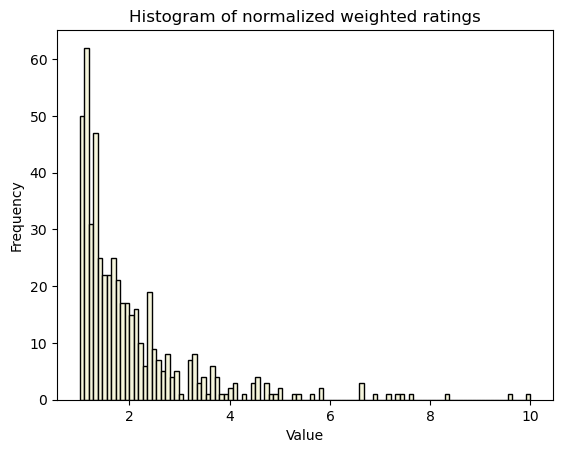

In [399]:
data = df_movies[df_movies['weightedRating'] > 1]['weightedRating']
plt.hist(data, bins=100, color='beige', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of normalized weighted ratings')
plt.show()

# TOP SCI-FI MOVIES

In [426]:
# genres: Thriller, Comedy, Crime, Action, Sci-Fi, Romance, Mystery, Musical, Family, 
# Documentary, Animation, Adventure, Action, Sport, Western, and more idk
genre = "Crime"
from_year = 1900
end_year = 2025
highest_n = 20

print(f"Top {highest_n} {genre} Movies from {from_year} to {end_year}, according to IMDB (weighted by rating and number of ratings):")

display(df_movies[\
    (df_movies['genres'].str.contains(genre)) &\
    (df_movies['startYear'] >= from_year)&\
    (df_movies['startYear'] <= end_year)]\
        .nlargest(highest_n,'weightedRating').reset_index())

Top 20 Crime Movies from 1900 to 2025, according to IMDB (weighted by rating and number of ratings):


,level_0,index,tconst,primaryTitle,startYear,genres,isAdult,directorNames,averageRating,numRatings,weightedRating
0,1,1,tt0468569,The Dark Knight,2008,"Action,Crime,Drama",0,Christopher Nolan,9.0,3012646,9.603369
1,3,3,tt0137523,Fight Club,1999,"Crime,Drama,Thriller",0,David Fincher,8.8,2457083,7.658355
2,5,5,tt0110912,Pulp Fiction,1994,"Crime,Drama",0,None,8.9,2329143,7.342081
3,7,7,tt0068646,The Godfather,1972,"Crime,Drama",0,Francis Ford Coppola,9.2,2119269,6.905688
4,12,12,tt0114369,Se7en,1995,"Crime,Drama,Mystery",0,David Fincher,8.6,1905357,5.803738
5,13,13,tt1345836,The Dark Knight Rises,2012,"Action,Crime,Drama",0,Christopher Nolan,8.4,1908504,5.678131
6,17,17,tt0102926,The Silence of the Lambs,1991,"Crime,Drama,Horror",0,Jonathan Demme,8.6,1630240,4.965729
7,18,18,tt0993846,The Wolf of Wall Street,2013,"Biography,Comedy,Crime",0,Martin Scorsese,8.2,1680554,4.880894
8,20,20,tt0372784,Batman Begins,2005,"Action,Crime,Drama",0,Christopher Nolan,8.2,1642910,4.771563
9,22,22,tt7286456,Joker,2019,"Crime,Drama,Thriller",0,Todd Phillips,8.3,1604190,4.715925


In [432]:
# genres: Thriller, Comedy, Crime, Action, Sci-Fi, Romance, Mystery, Musical, Family, 
# Documentary, Animation, Adventure, Action, Sport, Western, and more idk
genre = "Animation"
from_year = 1900
end_year = 2025
highest_n = 20

print(f"Top {highest_n} {genre} TV-Shows from {from_year} to {end_year}, according to IMDB (weighted by rating and number of ratings):")

display(df_shows[\
    (df_shows['genres'].str.contains(genre)) &\
    (df_shows['startYear'] >= from_year)&\
    (df_shows['startYear'] <= end_year)]\
        .nlargest(highest_n,'weightedRating').reset_index())

Top 20 Animation TV-Shows from 1900 to 2025, according to IMDB (weighted by rating and number of ratings):


,level_0,index,tconst,primaryTitle,startYear,genres,isAdult,directorNames,averageRating,numRatings,weightedRating
0,39,39,tt12590266,Cyberpunk: Edgerunners,2022,"Action,Adventure,Animation",0,"Hiroyuki Imaishi,Yoshiyuki Kaneko,Noboru Furuk...",8.3,102478,0.967699
1,46,46,tt3718778,Over the Garden Wall,2014,"Adventure,Animation,Comedy",0,None,8.7,79900,0.790856
2,51,51,tt3741634,Tokyo Ghoul,2014,"Action,Animation,Drama",0,Shûhei Morita,7.7,72644,0.636388
3,52,52,tt5249462,Erased,2016,"Animation,Crime,Drama",0,"Tomohiko Itô,Makoto Hoshino,Toshimasa Ishii,Ko...",8.4,65902,0.629810
4,87,87,tt20723374,Star Wars: Tales of the Jedi,2022,"Action,Adventure,Animation",0,"Saul Ruiz,Dave Filoni,None,Nathaniel Villanueva",8.1,39726,0.366093
5,107,107,tt7078180,Violet Evergarden,2018,"Animation,Drama,Family",0,"Haruka Fujita,Taichi Ishidate,Shinpei Sawa,Nor...",8.4,34389,0.328647
6,124,124,tt21056886,Scavengers Reign,2023,"Adventure,Animation,Drama",0,"Benjy Brooke,Vincent Tsui,Jonathan Djob Nkondo...",8.6,29362,0.287287
7,131,131,tt6660498,Devilman: Crybaby,2018,"Action,Animation,Drama",0,"Masaaki Yuasa,Katsunori Shibata,Takashi Kojima...",7.6,32067,0.277270
8,136,136,tt0495212,Hellsing Ultimate,2006,"Action,Animation,Fantasy",0,"Hiroyuki Tanaka,Tomokazu Tokoro,Yoshio Suzuki,...",8.2,28894,0.269558
9,175,175,tt4279012,Death Parade,2015,"Animation,Drama,Mystery",0,"Yuzuru Tachikawa,Shin'ichirô Watanabe,Jun Shis...",7.8,22407,0.198843


In [430]:
#lol
#this was my goal all along...
display(df_movies[df_movies['isAdult']==1].nlargest(25,'averageRating'))

,index,tconst,primaryTitle,startYear,genres,isAdult,directorNames,averageRating,numRatings,weightedRating
173991,173991,tt4551842,Cheater Cheater Pussy Eater,2013,Adult,1,None,9.7,8,0.000027
136878,136878,tt0161523,Dresden Diary 3,1989,Adult,1,Bruce Seven,9.5,25,0.000084
156604,156604,tt0151756,Nikki Dial's Secrets of Sexcess,1996,Adult,1,None,9.5,14,0.000047
159176,159176,tt13640498,XXX-Mas Fun!,2012,Adult,1,None,9.5,13,0.000044
157008,157008,tt13388066,Blood Moon: Timberwolves 2,2019,"Adult,Thriller",1,Steve Cruz,9.4,14,0.000047
178308,178308,tt0160135,Christy Canyon X-Posed 3,1990,Adult,1,None,9.4,7,0.000023
178317,178317,tt0160134,Christy Canyon X-Posed 2,1990,Adult,1,None,9.4,7,0.000023
162488,162488,tt1164590,The Strawberries and the Gun,2007,Mystery,1,Rei Sakamoto,9.3,12,0.000040
175139,175139,tt0160133,Christy Canyon X-Posed,1990,Adult,1,None,9.3,8,0.000026
181814,181814,tt21281610,Angel's Palace,2022,"Crime,Drama",1,Clarice Carolyn Louise Herring Jones,9.3,6,0.000020
